Lab 2

In [1]:
import pandas as pd
import numpy as np

In [2]:
mca = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv') #importing data frame

def threshold_drop(x):
    x = input("Maximum % accepted to drop nulls: ")
    return x

def threshold_replace(x):
    x = input("Maximum % accepted to use median to replace nulls: ")
    return x

for col in data.columns:
  if data[col].dtype == np.int64:
    print("I'm a int64 :-)")
  elif data[col].dtype == np.object:
    print("I'm an object")
  ...

In [3]:
def clean_dataset(data,c1,c2):
    '''function to clean a dataset'''
    
    #define accepted values
    #c1 = input("Maximum % accepted to drop nulls: ")
    #c2 = input("Maximum % accepted to use median to replace nulls: ")
    c1 = float(c1)
    c2 = float(c2)
    
    data_c = data.copy() #creates a copy of dataframe
    data_c = data_c.iloc[:,1:] #drops unamed column
    
    display(data_c.shape)  #displays shape
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(i.lower().replace(' ','_')) 
    data_c.columns = cols 
    cols = []
    
    datan = data_c._get_numeric_data()
    datao = data_c.select_dtypes(include=['object'])
    
    display(datan) #displays numerical columns
    display(datao) #displays categorical columns

    data_c = data_c.drop_duplicates(subset=None,keep='first') #removes duplicates
    
    #dealing with NaN 
    for col in datan.columns:
        perc = datan[col].isnull().sum()/len(datan)*100
        if perc <= c1:
            datan.dropna(subset=col, inplace=True)
        elif perc <= c2:
            median1 = datan[col].median()
            datan[col] = datan[col].fillna(median1)
        else:
            datan[col] = datan[col].fillna('Unknown')

    for col in datao.columns:
        perc = datao[col].isnull().sum()/len(datao)*100
        if perc <= c1:
            datao.dropna(subset=col, inplace=True)
        else:
            datao[col] = datao[col].fillna('Unknown')   
        
    #regrouping
    data_f = pd.DataFrame(columns=data_c.columns)
    data_f = pd.concat([datao,datan], axis=1)
    data_f.dropna(inplace=True)
    
    #handling date
    #correcting wrong date input
    display(data_f)
    data_f['effective_to_date'] = pd.to_datetime(data_f['effective_to_date'], errors='coerce')
    display(data_f['effective_to_date'])
    
    #creating list for months
    month1 = []
    for i in data_f['effective_to_date']: month1.append(i.month)
    
    #filtering Jan to March
    display(data_f[data_f['effective_to_date'].dt.month <=3])

    return data_f

In [4]:
mca_clean = clean_dataset(mca,6,10)
mca_clean

(9134, 23)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


LAB ANALYSIS 3

In [5]:
mca_clean.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
freq_resp = list(mca_clean['response'])

Text(0, 0.5, 'Frequency')

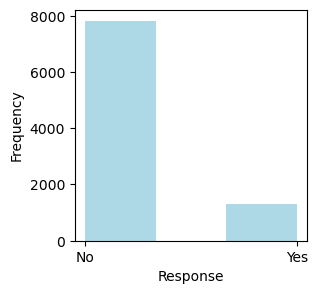

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize =(3,3))
ax.hist(freq_resp, rwidth=4, align='mid', color='lightblue', bins=3)
ax.set_xlabel('Response')
ax.set_ylabel('Frequency')

In [8]:
sc = mca_clean['sales_channel'].unique()
from operator import truediv
rr_sc = list(map(truediv, list(mca_clean.loc[mca_clean['response'] == 'Yes', ['sales_channel']].value_counts()*100), list(mca_clean['sales_channel'].value_counts())))

In [9]:
# Define your transformation function
def function6(col, lst):
    final = [0]*6
    for i in col:
        if i < lst[0]: 
            final[0] +=1
        elif i < lst[1]: 
            final[1] +=1
        elif i < lst[2]: 
            final[2] +=1
        elif i < lst[3]: 
            final[3] +=1
        elif i < lst[4]: 
            final[4] +=1
        else: 
            final[5] +=1
    return final
    

# Apply to columns
tca = [200,400,600,800,1000,1200]
yes_tca = mca_clean[mca_clean['response'] == 'Yes']['total_claim_amount']
yes_tca = function6(yes_tca,tca)
mca_tca = function6(mca_clean['total_claim_amount'],tca)
freq_tca = list(map(truediv, yes_tca, mca_tca))
freq_tca = list(map(truediv, freq_tca, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]))

In [10]:
# Define your transformation function
def function5(col, lst):
    final = [0]*5
    for i in col:
        if i < lst[0]: 
            final[0] +=1
        elif i < lst[1]: 
            final[1] +=1
        elif i < lst[2]: 
            final[2] +=1
        elif i < lst[3]: 
            final[3] +=1
        else: 
            final[4] +=1
    return final
    

# Apply to columns
inc = [20000,40000,60000,80000,100000]
yes_inc = mca_clean[mca_clean['response'] == 'Yes']['income']
yes_inc = function5(yes_inc,inc)
mca_inc = function5(mca_clean['income'],inc)
freq_inc = list(map(truediv, yes_inc, mca_inc))
freq_inc = list(map(truediv, freq_inc, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]))

Text(0.5, 1.0, 'Response rate by Income')

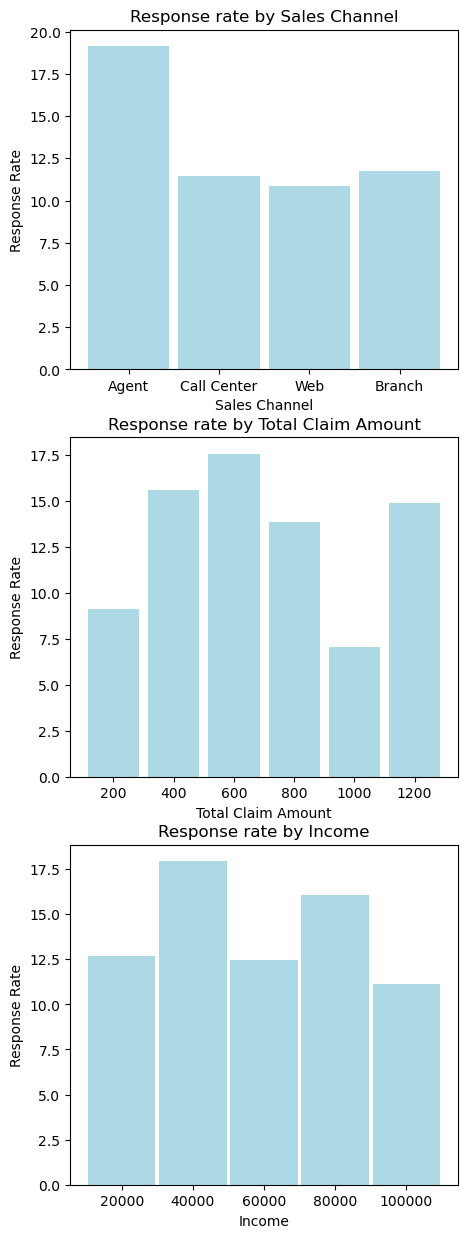

In [11]:
fig, axes = plt.subplots(3,1,figsize=(5,15))
axes[0].bar(sc, rr_sc, width=0.9, align='center', color='lightblue')
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Response Rate')
axes[0].set_title('Response rate by Sales Channel')
axes[1].bar(tca, freq_tca, width=170, align='center', color='lightblue')
axes[1].set_xlabel('Total Claim Amount')
axes[1].set_ylabel('Response Rate')
axes[1].set_title('Response rate by Total Claim Amount')
axes[2].bar(inc, freq_inc, width=19000, align='center', color='lightblue')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Response Rate')
axes[2].set_title('Response rate by Income')

In [12]:
#ax=sns.boxplot(x="total_claim_amount", y="response", data=mca_clean)
#ax.set(xlabel="Total Claim Amount")
#ax.set(ylabel="Response")
#plt.show()

In [13]:
#ax=sns.boxplot(x="income", y="response", data=mca_clean)
#ax.set(xlabel="Income")
#ax.set(ylabel="Response")
#plt.show()

In [14]:
#sns.boxplot(y = 'income', data= mca_clean[mca_clean['gender']=='M'])

In [15]:
#sns.histplot(hue = 'response',x='total_claim_amount', data=mca_clean)

LAB ANALYSIS 4

In [16]:
mca_n = mca_clean._get_numeric_data()
mca_o = mca_clean.select_dtypes(include=['object'])
mca_n.columns
mca_n

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

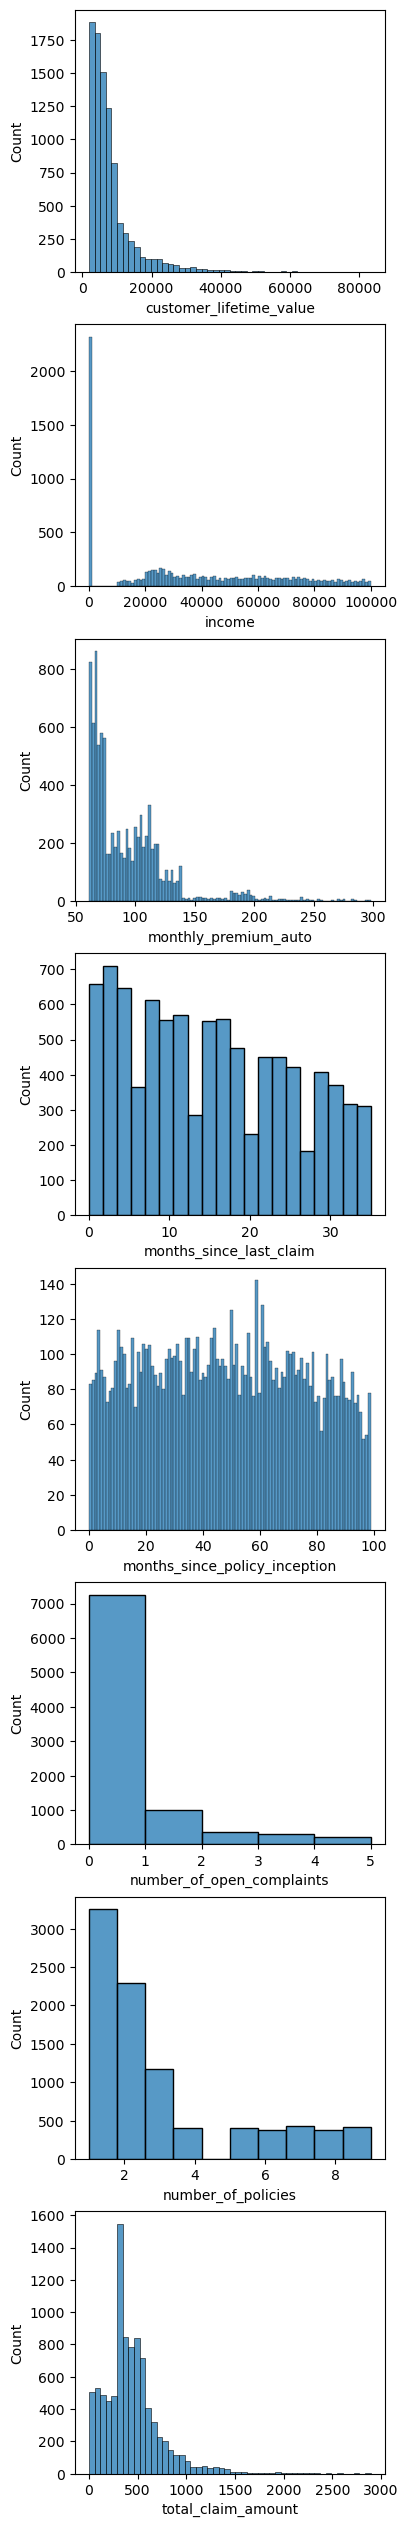

In [17]:
fig, ax1 = plt.subplots(8,1,figsize=(4,32))
sns.histplot(mca_n[mca_n.columns[0]], bins=50, ax=ax1[0])
sns.histplot(mca_n[mca_n.columns[1]], bins=100, ax=ax1[1])
sns.histplot(mca_n[mca_n.columns[2]], bins=100, ax=ax1[2])
sns.histplot(mca_n[mca_n.columns[3]], bins=20, ax=ax1[3])
sns.histplot(mca_n[mca_n.columns[4]], bins=100, ax=ax1[4])
sns.histplot(mca_n[mca_n.columns[5]], bins=5, ax=ax1[5])
sns.histplot(mca_n[mca_n.columns[6]], bins=10, ax=ax1[6])
sns.histplot(mca_n[mca_n.columns[7]], bins=50, ax=ax1[7])

Text(0, 0.5, 'Count')

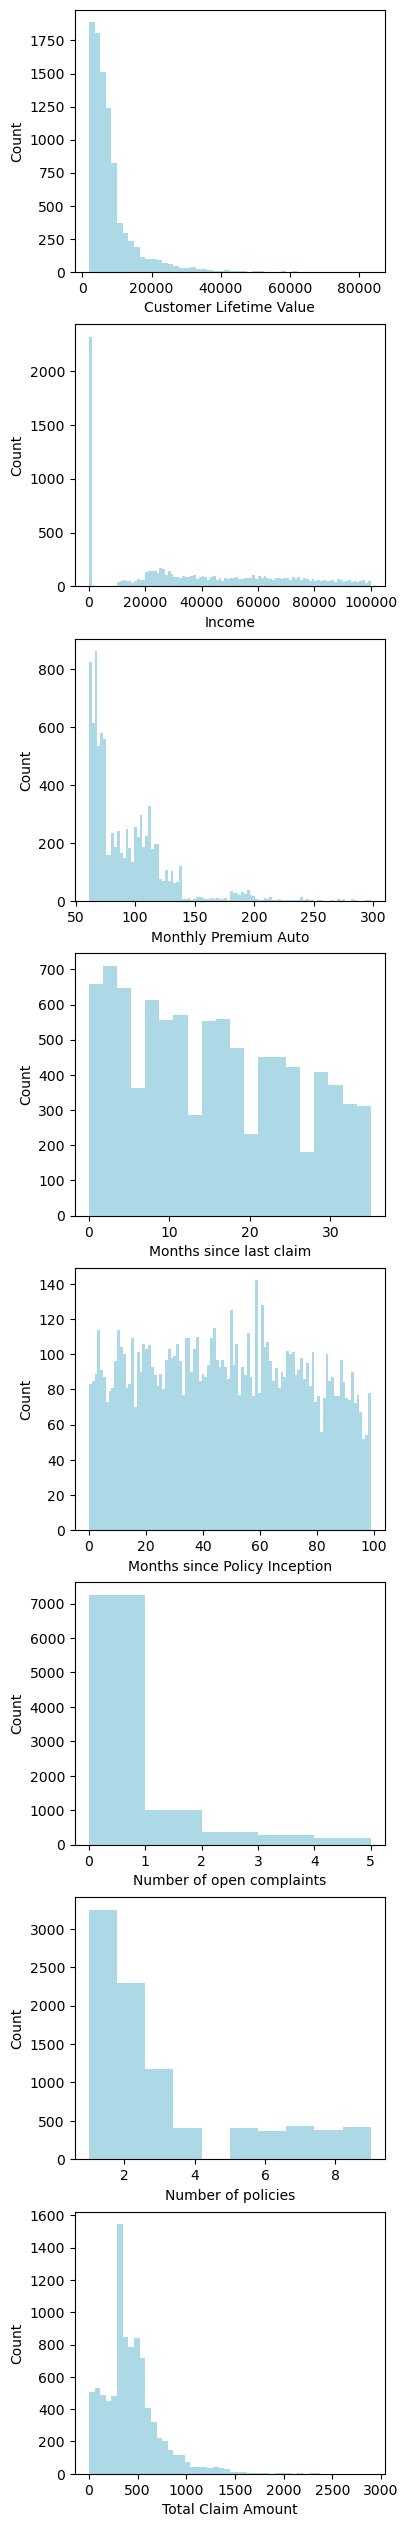

In [18]:
fig, ax1 = plt.subplots(8,1,figsize=(4,32))
ax1[0].hist(mca_n[mca_n.columns[0]], align='mid', color='lightblue', bins=50)
ax1[0].set_xlabel('Customer Lifetime Value')
ax1[0].set_ylabel('Count')
ax1[1].hist(mca_n[mca_n.columns[1]], align='mid', color='lightblue', bins=100)
ax1[1].set_xlabel('Income')
ax1[1].set_ylabel('Count')
ax1[2].hist(mca_n[mca_n.columns[2]], align='mid', color='lightblue', bins=100)
ax1[2].set_xlabel('Monthly Premium Auto')
ax1[2].set_ylabel('Count')
ax1[3].hist(mca_n[mca_n.columns[3]], align='mid', color='lightblue', bins=20)
ax1[3].set_xlabel('Months since last claim')
ax1[3].set_ylabel('Count')
ax1[4].hist(mca_n[mca_n.columns[4]], align='mid', color='lightblue', bins=100)
ax1[4].set_xlabel('Months since Policy Inception')
ax1[4].set_ylabel('Count')
ax1[5].hist(mca_n[mca_n.columns[5]], align='mid', color='lightblue', bins=5)
ax1[5].set_xlabel('Number of open complaints')
ax1[5].set_ylabel('Count')
ax1[6].hist(mca_n[mca_n.columns[6]], align='mid', color='lightblue', bins=10)
ax1[6].set_xlabel('Number of policies')
ax1[6].set_ylabel('Count')
ax1[7].hist(mca_n[mca_n.columns[7]], align='mid', color='lightblue', bins=50)
ax1[7].set_xlabel('Total Claim Amount')
ax1[7].set_ylabel('Count')

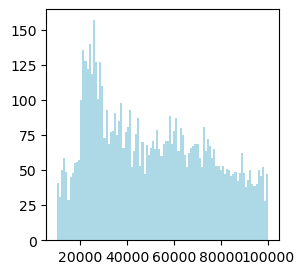

In [19]:
# removing income = 0, to check distribution 
mca_inc = mca_n[mca_n['income']!=0].copy()
fig, ax = plt.subplots(figsize =(3,3))
ax.hist(mca_inc[mca_inc.columns[1]], align='mid', color='lightblue', bins=100)
plt.show()

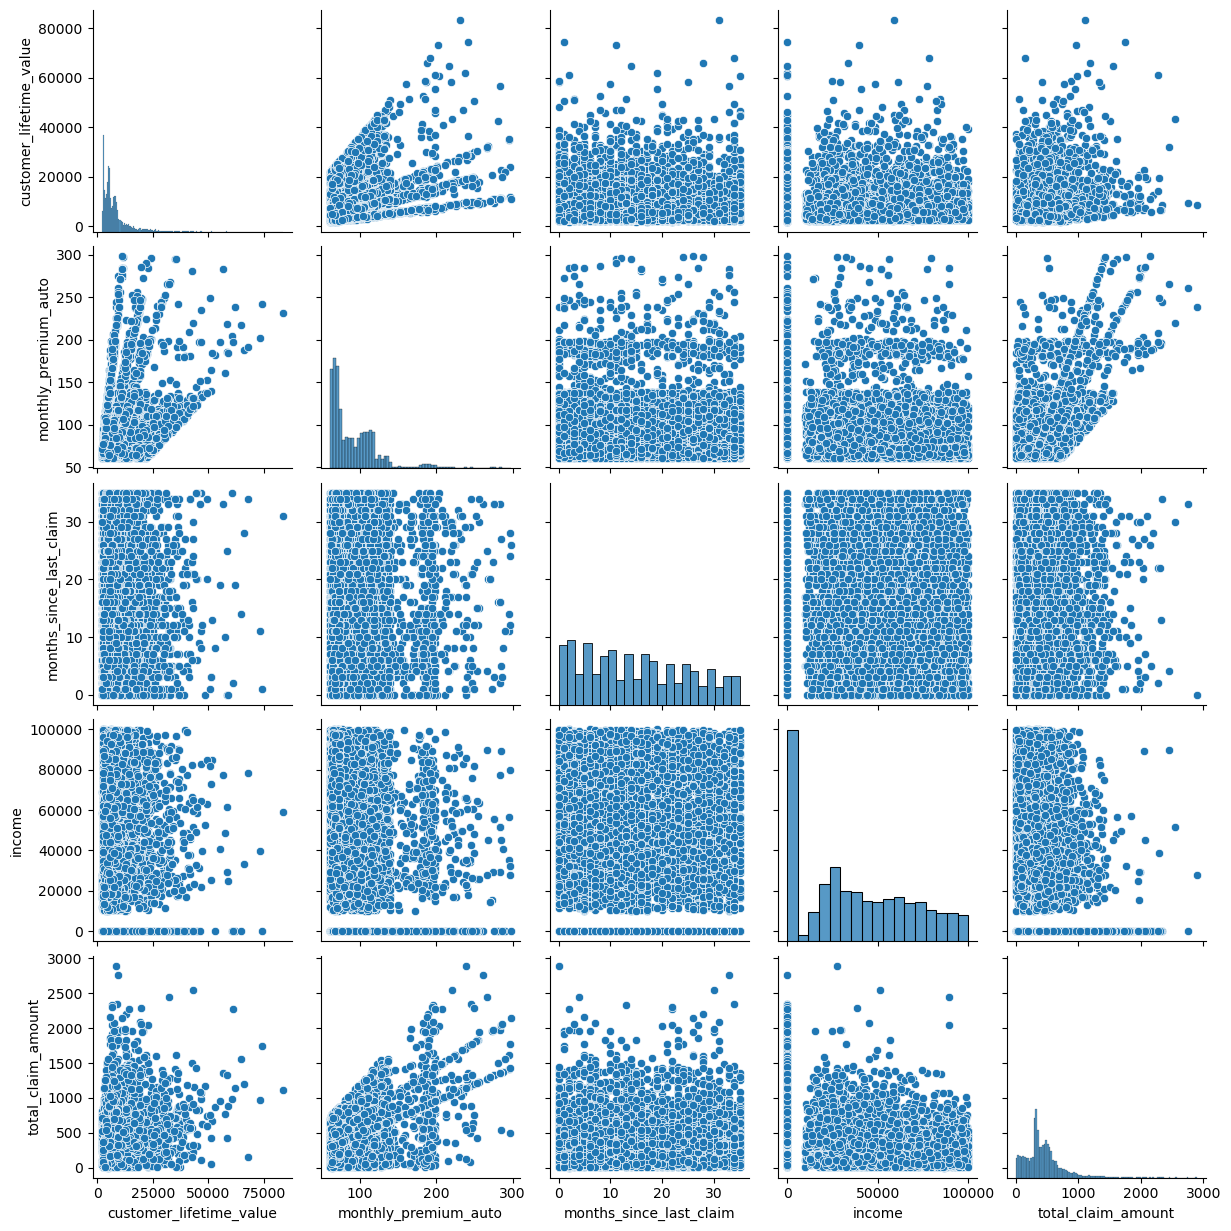

In [20]:
sns.pairplot(mca_n[['customer_lifetime_value','monthly_premium_auto','months_since_last_claim','income','total_claim_amount']])

In [21]:
#there seems to be no great correlation between any of two columns.

In [22]:
mca_corr = mca_n.corr()
mca_corr
#confirming that columns not plotted on the pairplot do not have higher correlation with total claim amount

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

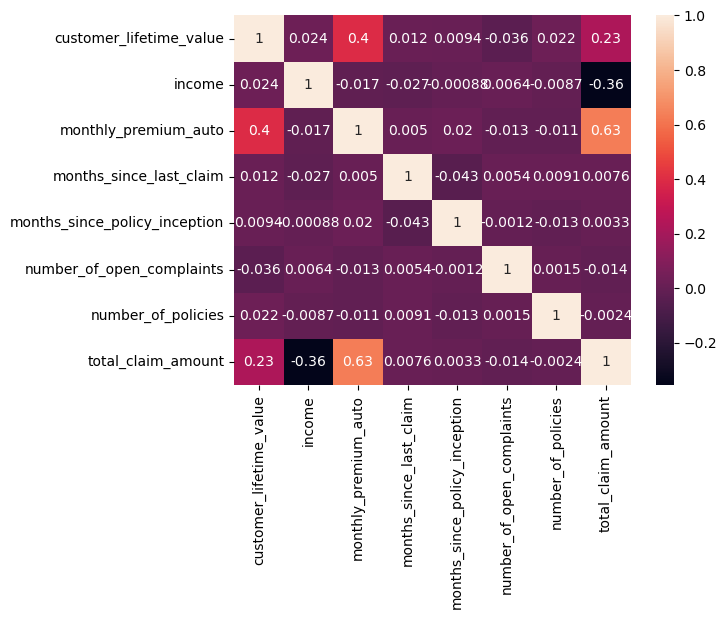

In [23]:
sns.heatmap(mca_corr, annot=True)

In [24]:
#there is no correlation greater than 0.9

In [25]:
#making the dataframe to do the model prediciton later
mca_sel = mca_n.drop(['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis=1)
mca_sel.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


Lab 5

In [26]:
#splitting x and y
y = mca_sel['total_claim_amount']
x = mca_sel.drop(['total_claim_amount'], axis=1)

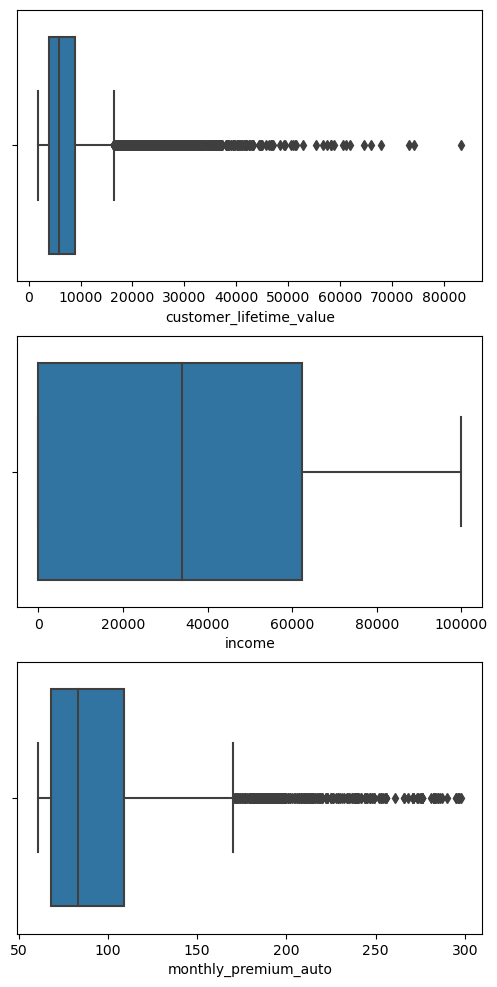

In [27]:
fig, ax = plt.subplots(3,1,figsize=(6,12))
sns.boxplot(x='customer_lifetime_value', data=mca_sel, ax = ax[0])
sns.boxplot(x='income', data=mca_sel, ax = ax[1])
sns.boxplot(x='monthly_premium_auto', data=mca_sel, ax = ax[2])
plt.show()

In [28]:
#I am creating 2 data bases to make 2 model predictions later
#normalized, keeping outliers
#normalized, without outliers

In [29]:
#Normalize while maintaining outliers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x_norm = MinMaxScaler().fit(x).transform(x)
print(x_norm.shape)
pd.DataFrame(x_norm, columns=x.columns)

x_std = StandardScaler().fit(x_norm).transform(x_norm)
print(x_std.shape)
x_std = pd.DataFrame(x_std, columns=x.columns)

(9134, 3)
(9134, 3)


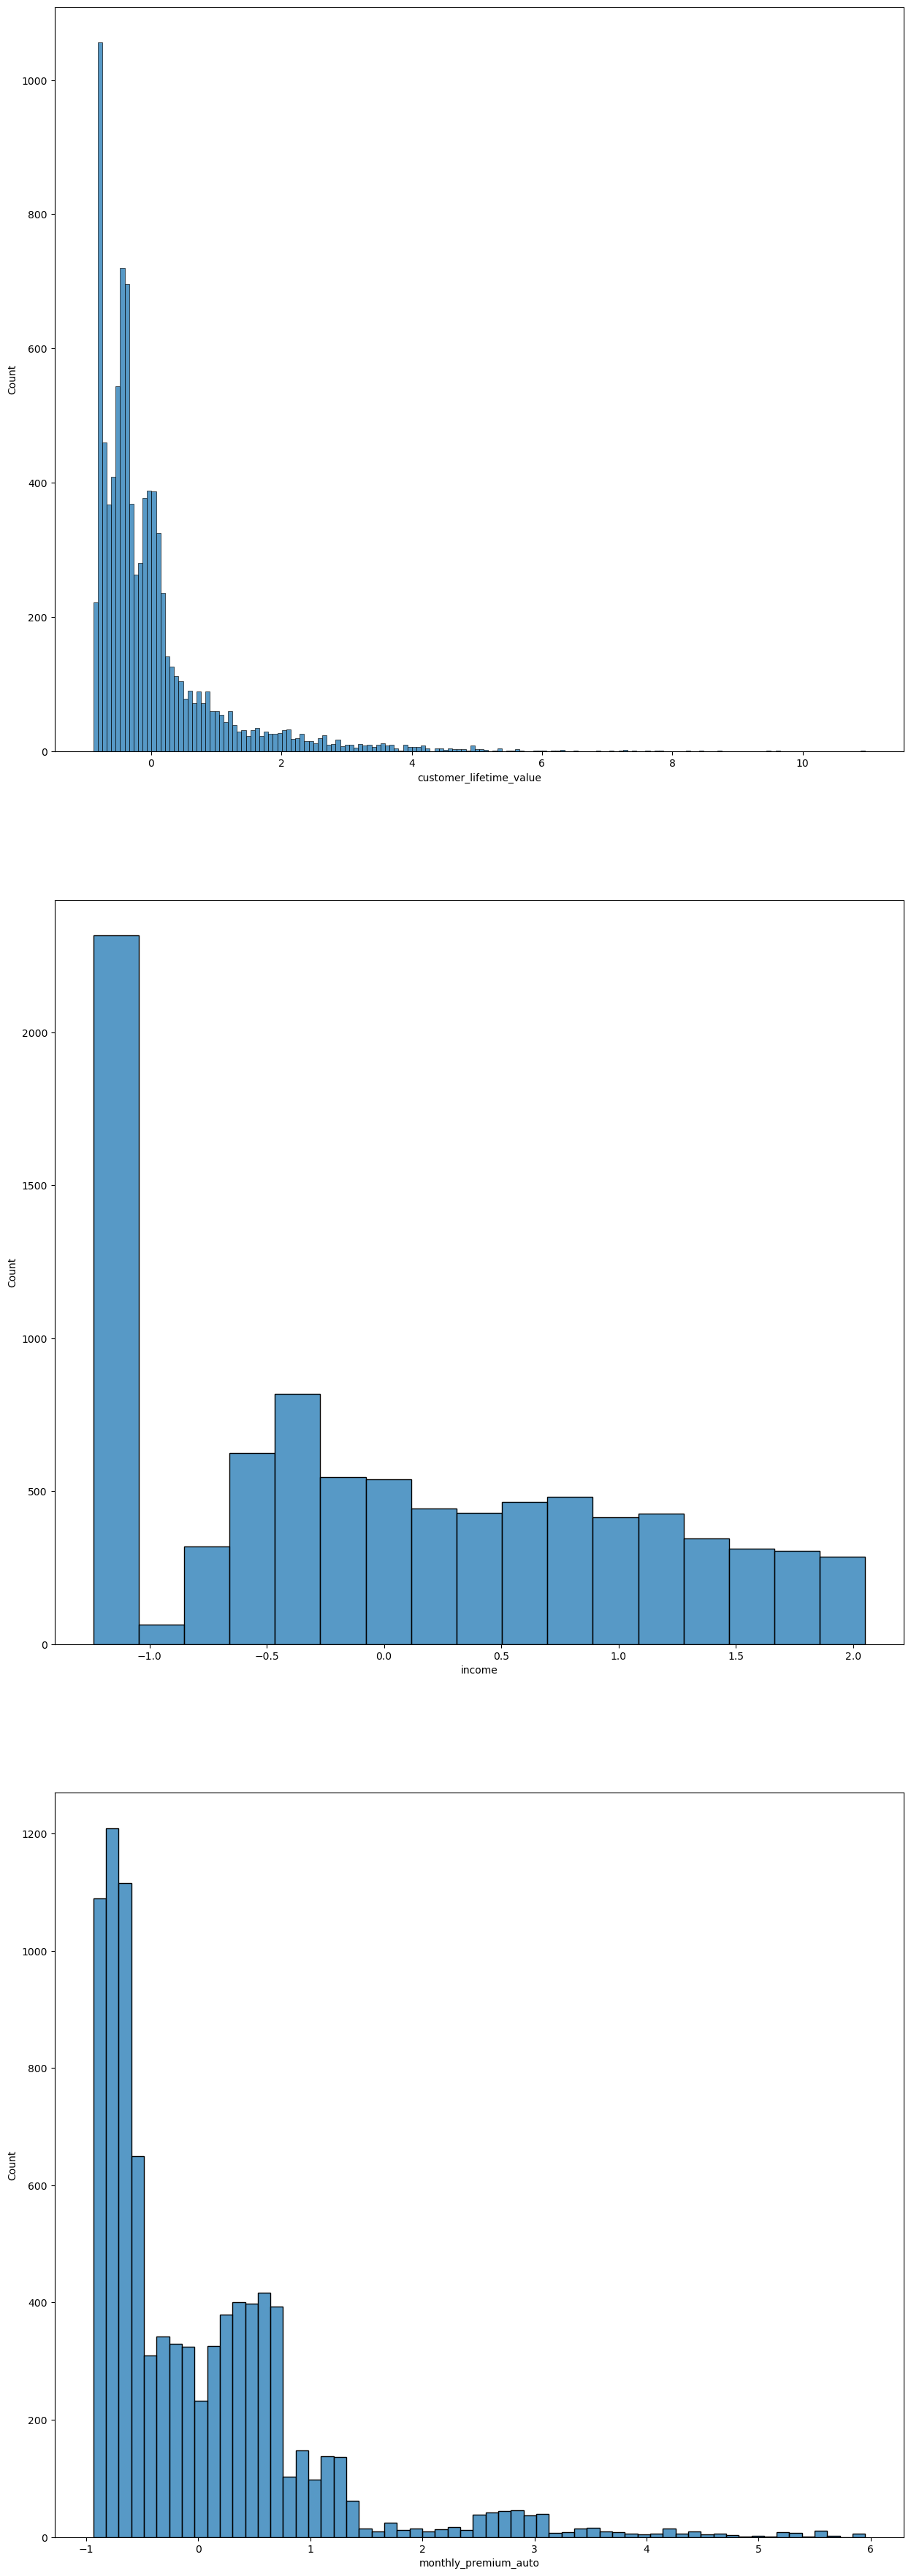

In [31]:
fig, ax = plt.subplots(3,1,figsize=(15,45))
sns.histplot(x_std['customer_lifetime_value'], ax=ax[0])
sns.histplot(x_std['income'], ax=ax[1])
sns.histplot(x_std['monthly_premium_auto'], ax=ax[2])
plt.show()

In [32]:
#Normalize while dropping outliers

#removing outliers
#customer lifetime value
iqr_clv = np.percentile(x['customer_lifetime_value'],75) - np.percentile(x['customer_lifetime_value'],25)
upper_limit = np.percentile(x['customer_lifetime_value'],75) + 1.5*iqr_clv
lower_limit = np.percentile(x['customer_lifetime_value'],25) - 1.5*iqr_clv
x_out = mca_sel[(mca_sel['customer_lifetime_value']>lower_limit) & (mca_sel['customer_lifetime_value']<upper_limit)]

#income
iqr_inc = np.percentile(x['income'],75) - np.percentile(x['income'],25)
upper_limit = np.percentile(x['income'],75) + 1.5*iqr_inc
lower_limit = np.percentile(x['income'],25) - 1.5*iqr_inc
x_out2 = x_out[(x_out['income']>lower_limit) & (x_out['income']<upper_limit)]

#montly premium auto
iqr_mpa = np.percentile(x['monthly_premium_auto'],75) - np.percentile(x['monthly_premium_auto'],25)
upper_limit = np.percentile(x['monthly_premium_auto'],75) + 1.5*iqr_mpa
lower_limit = np.percentile(x['monthly_premium_auto'],25) - 1.5*iqr_mpa
x_out3 = x_out2[(x_out2['monthly_premium_auto']>lower_limit) & (x_out2['monthly_premium_auto']<upper_limit)]
y_out = x_out3['total_claim_amount']
x_out4 = x_out3.drop(['total_claim_amount'], axis=1)

x_out_norm = MinMaxScaler().fit(x_out4).transform(x_out4)
print(x_out_norm.shape)
pd.DataFrame(x_out_norm, columns=x.columns)

x_out_std = StandardScaler().fit(x_out_norm).transform(x_out_norm)
print(x_out_std.shape)
x_out_std = pd.DataFrame(x_out_std, columns=x.columns)

(8033, 3)
(8033, 3)


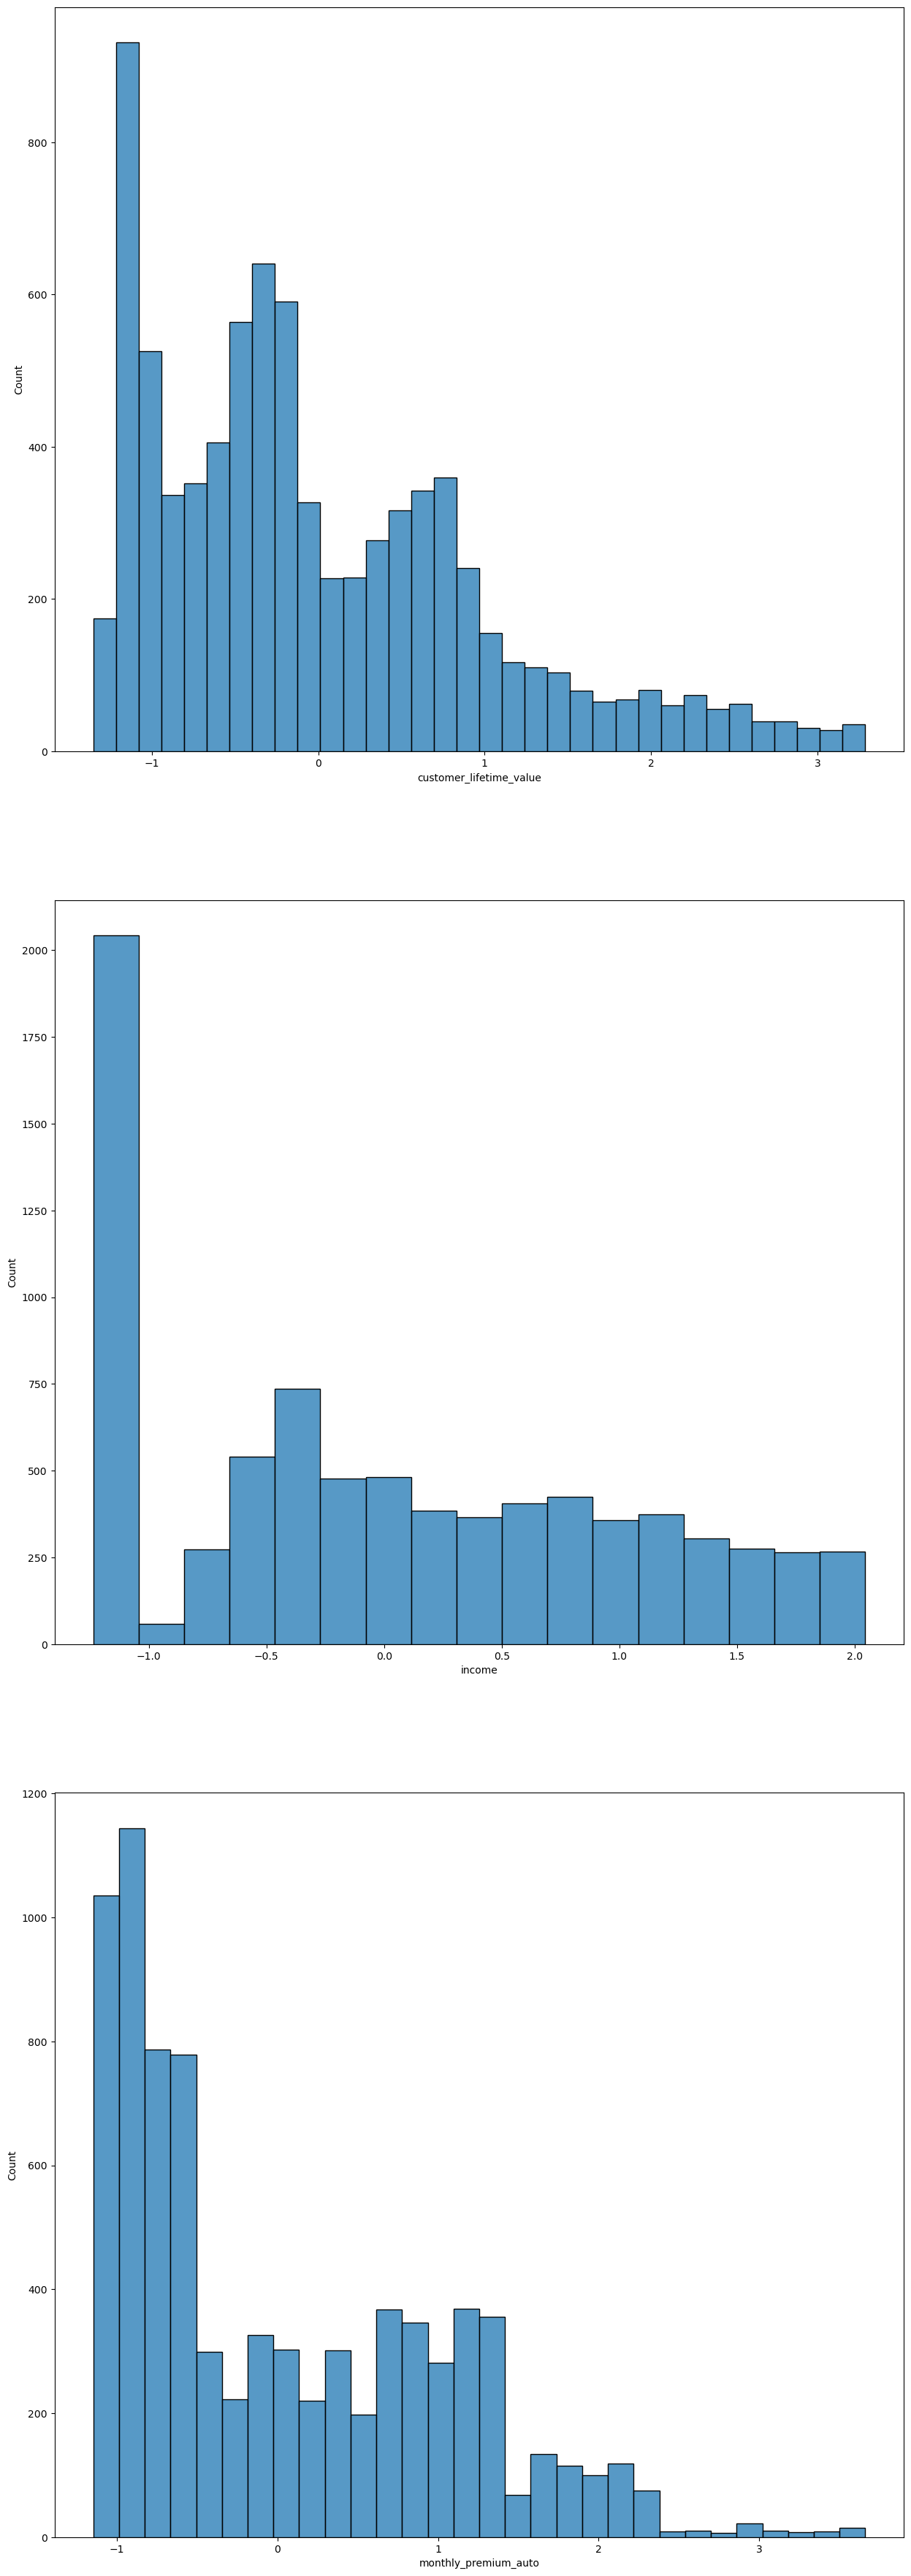

In [33]:
fig, ax = plt.subplots(3,1,figsize=(15,45))
sns.histplot(x_out_std['customer_lifetime_value'], ax=ax[0])
sns.histplot(x_out_std['income'], ax=ax[1])
sns.histplot(x_out_std['monthly_premium_auto'], ax=ax[2])

plt.show()

Lab 6

In [34]:
#I am testing the x,y where outliers were removed
x_out_std.describe()

,customer_lifetime_value,income,monthly_premium_auto
count,8.033000e+03,8.033000e+03,8.033000e+03
mean,-2.598859e-16,3.164682e-16,-1.067655e-17
std,1.000062e+00,1.000062e+00,1.000062e+00
min,-1.352047e+00,-1.236499e+00,-1.147543e+00
25%,-7.848411e-01,-1.236499e+00,-8.387679e-01
50%,-2.432440e-01,-1.266165e-01,-3.535501e-01
75%,6.135180e-01,8.104296e-01,7.933283e-01
max,3.287664e+00,2.045000e+00,3.660524e+00


In [35]:
y_out.describe()

count    8033.000000
mean      400.631270
std       233.864162
min         0.099007
25%       261.930545
50%       364.800000
75%       528.000000
max      1985.999807
Name: total_claim_amount, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#split between train and test sets

#I am fixing random in order to compare later to other datasets
x_train, x_test, y_train, y_test = train_test_split(x_out_std, y_out, test_size=0.3, random_state=42)
#choosing 0.3 as we have 8033 data points

#applying linear regression
lm = LinearRegression().fit(x_train, y_train)

#predicting y from train and test sets
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

b = lm.intercept_
m = lm.coef_  

#scoring
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt 
#R2
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
#MSE
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_train, y_train)
#RMSE
rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = sqrt(mean_squared_error(y_pred_train, y_train))
#MAE
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_train, y_train)
print(r2_train, mse_train, rmse_train, mae_train)
print(r2_test, mse_test, rmse_test, mae_test)

-0.4929114199918574 33042.85614071445 181.7769406187552 133.92380932069543
-0.5381981613808895 33042.85614071445 181.7769406187552 133.92380932069543


plt.scatter(x_train['customer_lifetime_value'], y_train, color='b') 
plt.scatter(x_train['income'], y_train, color='g') 
plt.scatter(x_train['monthly_premium_auto'], y_train, color='r')
plt.plot(x_train, m*x_train+b, color='k')

Lab 7

In [37]:
#I am fixing random in order to compare later to other datasets
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=42)
#choosing 0.3 as we have 8033 data points

#applying linear regression
lm = LinearRegression().fit(x_train, y_train)

#predicting y from train and test sets
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

b = lm.intercept_
m = lm.coef_  

#scoring
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt 
#R2
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
#MSE
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_train, y_train)
#RMSE
rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = sqrt(mean_squared_error(y_pred_train, y_train))
#MAE
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_train, y_train)
print(r2_train, mse_train, rmse_train, mae_train)
print(r2_test, mse_test, rmse_test, mae_test)

0.07216430282992214 41176.61375165442 202.92021523656635 145.1315999451074
0.08828739521840179 41176.61375165442 202.92021523656635 145.1315999451074


In [ ]:
#without outliers, it gets worse

In [ ]:
#taking customer lifetime values, as it is the one with less correlation

In [40]:
x_out_2 = x_out_std.drop(['customer_lifetime_value'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_out_2, y_out, test_size=0.3, random_state=42)
#choosing 0.3 as we have 8033 data points

#applying linear regression
lm = LinearRegression().fit(x_train, y_train)

#predicting y from train and test sets
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

b = lm.intercept_
m = lm.coef_  

#scoring
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt 
#R2
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
#MSE
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_train, y_train)
#RMSE
rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = sqrt(mean_squared_error(y_pred_train, y_train))
#MAE
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_train, y_train)
print(r2_train, mse_train, rmse_train, mae_train)
print(r2_test, mse_test, rmse_test, mae_test)

-0.4957001331625659 33067.58789852846 181.8449556587382 133.96553998104977
-0.5437315051430749 33067.58789852846 181.8449556587382 133.96553998104977


In [ ]:
#it is worse